In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from helper import create_dummy_df
%matplotlib inline

df_listings = pd.read_csv('../NYC/data/listings.csv', low_memory=False, verbose=1)

df_listings.head()

Tokenization took: 1880.00 ms
Type conversion took: 1543.76 ms
Parser memory cleanup took: 20.04 ms


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2060,https://www.airbnb.com/rooms/2060,20200608144437,2020-06-09,Modern NYC,NaN,"Lovely, spacious, sunny 1 BR apartment in 6th ...","Lovely, spacious, sunny 1 BR apartment in 6th ...",none,NaN,...,f,f,flexible,f,f,1,0,1,0,0.01
1,2595,https://www.airbnb.com/rooms/2595,20200608144437,2020-06-09,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.37
2,3831,https://www.airbnb.com/rooms/3831,20200608144437,2020-06-09,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",We host on the entire top floor of our double-...,"Enjoy 500 s.f. top floor in 1899 brownstone, w...",none,Just the right mix of urban center and local n...,...,f,f,flexible,f,f,1,1,0,0,4.64
3,5099,https://www.airbnb.com/rooms/5099,20200608144437,2020-06-09,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment has a true New Yo...,I have a large 1 bedroom apartment centrally l...,My large 1 bedroom apartment has a true New Yo...,none,My neighborhood in Midtown East is called Murr...,...,f,f,moderate,t,t,1,1,0,0,0.58
4,5121,https://www.airbnb.com/rooms/5121,20200608144437,2020-06-09,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,0.37


In [2]:
df_listings.cleaning_fee.value_counts()

$50.00     3981
$100.00    3674
$0.00      2702
$30.00     2354
$25.00     2299
           ... 
$198.00       1
$147.00       1
$127.00       1
$725.00       1
$285.00       1
Name: cleaning_fee, Length: 221, dtype: int64

In [3]:
df_listings.security_deposit.value_counts()

$0.00        13098
$100.00       3750
$500.00       3379
$200.00       2552
$300.00       1854
             ...  
$163.00          1
$2,027.00        1
$2,595.00        1
$189.00          1
$2,700.00        1
Name: security_deposit, Length: 221, dtype: int64

In [4]:
df_listings.weekly_price.value_counts()

$500.00      272
$1,000.00    236
$700.00      218
$800.00      203
$600.00      200
            ... 
$695.00        1
$815.00        1
$1,395.00      1
$596.00        1
$1,323.00      1
Name: weekly_price, Length: 582, dtype: int64

In [5]:
# Choosing features for dataframe
df_listings = pd.DataFrame(df_listings, columns=['host_is_superhost', 'neighbourhood','neighbourhood_group_cleansed',
                                                 'property_type', 'room_type', 
                                                 'accommodates', 'bathrooms' , 'bedrooms', 'beds',
                                                 'price', 'security_deposit', 'cleaning_fee',
                                                 'guests_included', 'minimum_nights', 
                                                 'availability_30', 'availability_365',
                                                 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                                                 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'
                                                  
                                              ])

df_listings = df_listings.rename(columns={'neighbourhood_group_cleansed':'neighbourhood_group'})

df_listings['price'] = df_listings['price'].str.replace("[$, ]", "").astype("float")
df_listings['cleaning_fee'] = df_listings['cleaning_fee'].str.replace("[$, ]", "").astype("float")
df_listings['security_deposit'] = df_listings['security_deposit'].str.replace("[$, ]", "").astype("float")

df_listings.shape

(49530, 24)

In [6]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49530 entries, 0 to 49529
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_is_superhost            49524 non-null  object 
 1   neighbourhood                49519 non-null  object 
 2   neighbourhood_group          49530 non-null  object 
 3   property_type                49530 non-null  object 
 4   room_type                    49530 non-null  object 
 5   accommodates                 49530 non-null  int64  
 6   bathrooms                    49453 non-null  float64
 7   bedrooms                     49388 non-null  float64
 8   beds                         48992 non-null  float64
 9   price                        49530 non-null  float64
 10  security_deposit             32347 non-null  float64
 11  cleaning_fee                 38668 non-null  float64
 12  guests_included              49530 non-null  int64  
 13  minimum_nights  

In [7]:
num_df = df_listings.select_dtypes(include=[np.number])
num_df_var = list(num_df)
num_df_var

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'minimum_nights',
 'availability_30',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

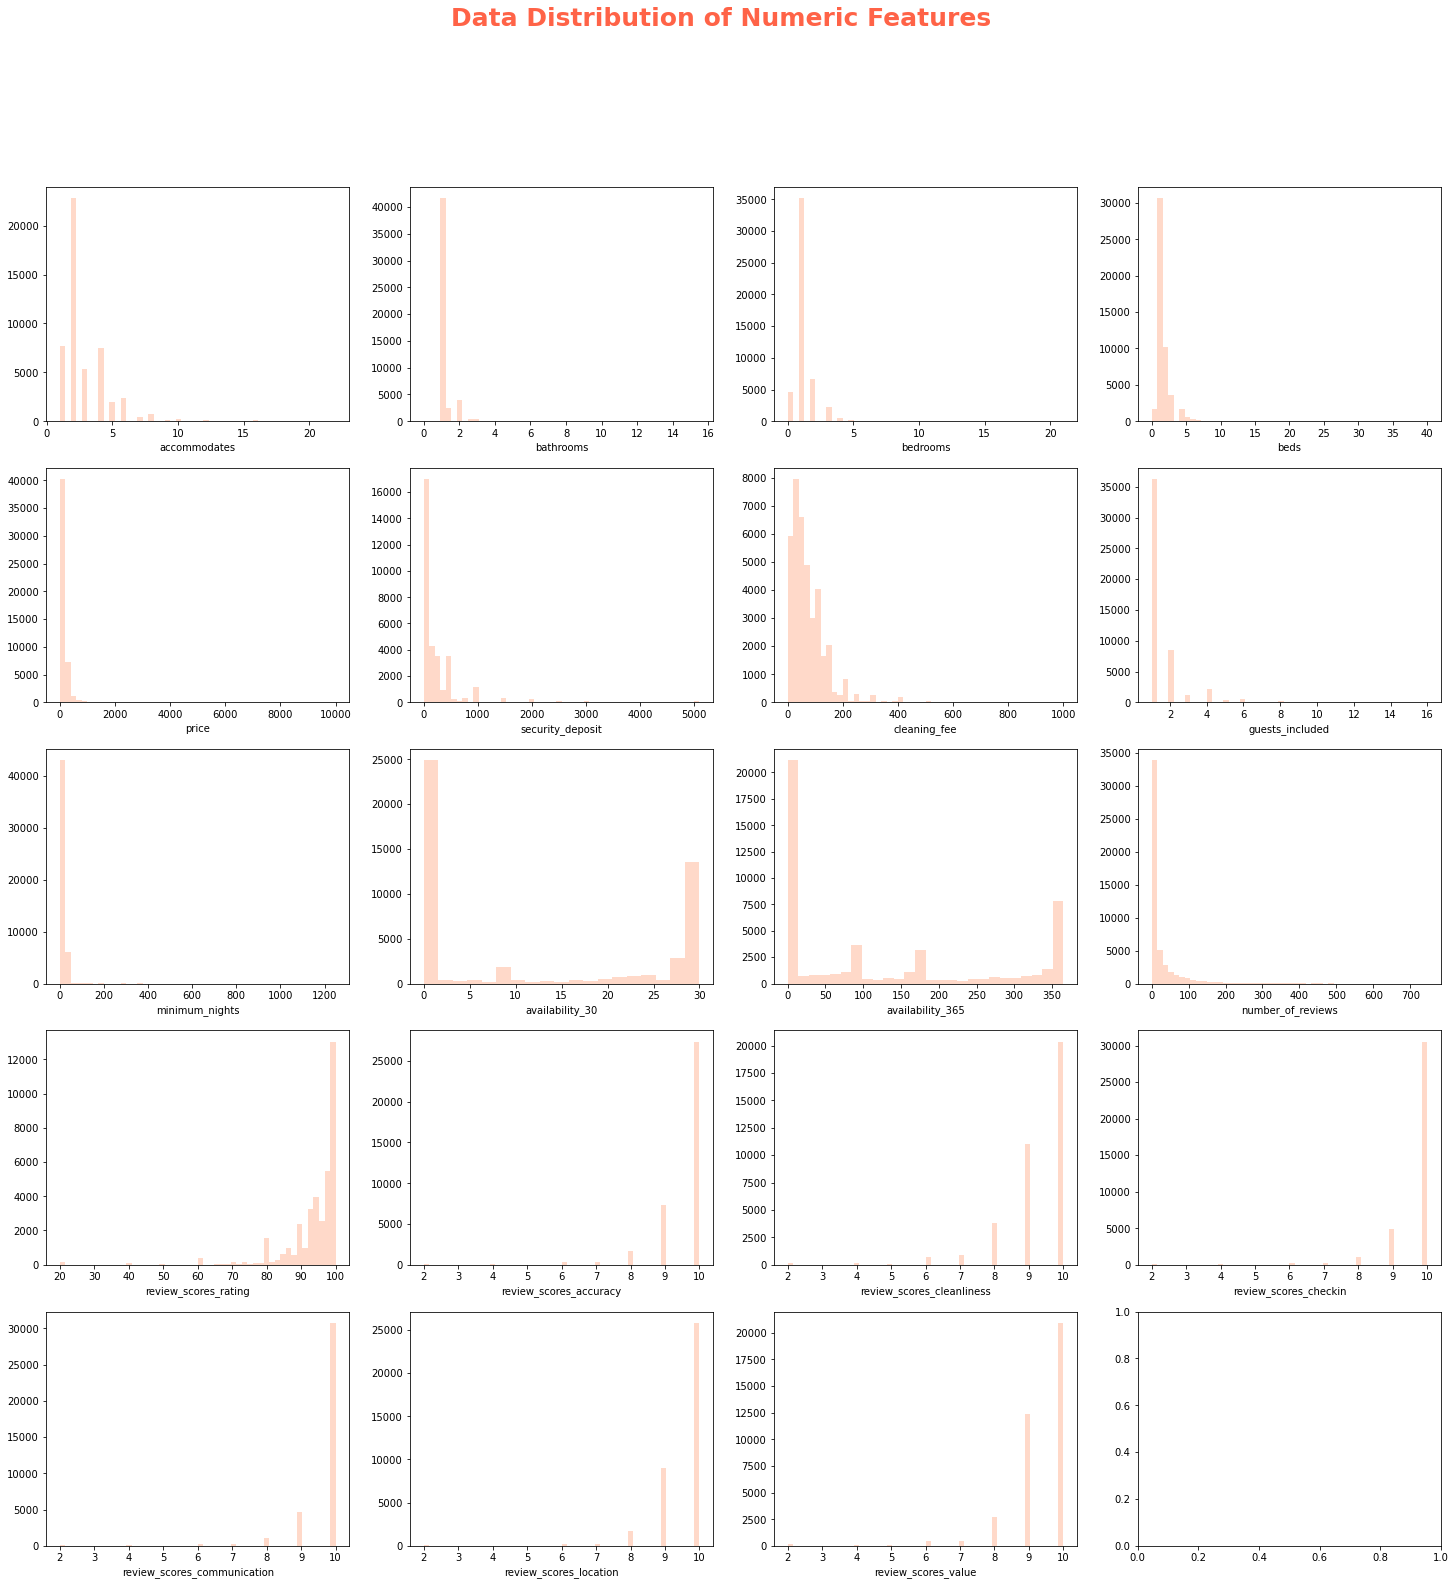

In [8]:
graphs = len(num_df_var)

# Create position list 
position = []
for i in range(5):
    for j in range(4):
        pos_graph = i, j
        position.append(pos_graph)
        
fig, axes = plt.subplots(5,4)
fig.set_size_inches(25,25)
plt.suptitle("Data Distribution of Numeric Features", 
             fontsize=25, fontweight='bold', color='Tomato')
for i in range(graphs):
    sns.distplot(num_df[num_df_var[i]], ax=axes[position[i]], color='lightsalmon', kde=False)


In [9]:
df_listings.isnull().sum()

host_is_superhost                  6
neighbourhood                     11
neighbourhood_group                0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         77
bedrooms                         142
beds                             538
price                              0
security_deposit               17183
cleaning_fee                   10862
guests_included                    0
minimum_nights                     0
availability_30                    0
availability_365                   0
number_of_reviews                  0
review_scores_rating           12287
review_scores_accuracy         12321
review_scores_cleanliness      12307
review_scores_checkin          12334
review_scores_communication    12317
review_scores_location         12337
review_scores_value            12336
dtype: int64

In [10]:
# % missing values
total = df_listings.isnull().sum().sort_values(ascending=False)
percent = ((df_listings.isnull().sum()) * 100) / df_listings.isnull().count().sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total Missing Instances', '% Missing'], sort=False).sort_values('Total Missing Instances', ascending=False)
missing

,Total Missing Instances,% Missing
security_deposit,17183,34.692106
review_scores_location,12337,24.908136
review_scores_value,12336,24.906118
review_scores_checkin,12334,24.902080
review_scores_accuracy,12321,24.875833
review_scores_communication,12317,24.867757
review_scores_cleanliness,12307,24.847567
review_scores_rating,12287,24.807188
cleaning_fee,10862,21.930143
beds,538,1.086210


In [11]:
# Mean function
fill_mean = lambda col: col.fillna(col.mean())

# Fill missing values by mean
df_listings[['cleaning_fee']]=df_listings[['cleaning_fee']].transform(fill_mean)
df_listings[['security_deposit']]=df_listings[['security_deposit']].transform(fill_mean)    

# Remove missing values 
df_listings = df_listings.dropna(subset=['neighbourhood', 'host_is_superhost'], axis=0)
df_listings.isnull().sum()

host_is_superhost                  0
neighbourhood                      0
neighbourhood_group                0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         77
bedrooms                         142
beds                             538
price                              0
security_deposit                   0
cleaning_fee                       0
guests_included                    0
minimum_nights                     0
availability_30                    0
availability_365                   0
number_of_reviews                  0
review_scores_rating           12280
review_scores_accuracy         12314
review_scores_cleanliness      12300
review_scores_checkin          12327
review_scores_communication    12310
review_scores_location         12330
review_scores_value            12329
dtype: int64

In [12]:
# Fill all review scores with median function
df_listings.fillna(df_listings.median(), inplace=True)
df_listings.isnull().sum()

host_is_superhost              0
neighbourhood                  0
neighbourhood_group            0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
price                          0
security_deposit               0
cleaning_fee                   0
guests_included                0
minimum_nights                 0
availability_30                0
availability_365               0
number_of_reviews              0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64

In [13]:
# Check dataset again 
df_listings.describe()

,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,minimum_nights,availability_30,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,49513.000000,49513.000000,49513.000000,49513.000000,49513.000000,49513.000000,49513.000000,49513.000000,49513.000000,49513.000000,49513.000000,49513.000000,49513.000000,49513.000000,49513.000000,49513.000000,49513.000000,49513.000000,49513.000000
mean,2.836487,1.149011,1.186214,1.532507,162.667966,271.952964,70.368159,1.500454,8.193000,12.228910,126.653768,23.873205,94.371296,9.703007,9.453275,9.797952,9.796922,9.695757,9.535253
std,1.875283,0.435294,0.766628,1.135136,419.380682,423.454283,58.794439,1.154423,21.978083,13.518355,142.379194,48.252643,8.050601,0.790451,1.017957,0.679500,0.709517,0.697225,0.882231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,68.000000,0.000000,30.000000,1.000000,2.000000,0.000000,0.000000,1.000000,94.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000
50%,2.000000,1.000000,1.000000,1.000000,101.000000,271.977649,70.367565,1.000000,3.000000,1.000000,79.000000,5.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,4.000000,1.000000,1.000000,2.000000,175.000000,271.977649,80.000000,2.000000,6.000000,29.000000,267.000000,23.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,22.000000,15.500000,21.000000,40.000000,10000.000000,5100.000000,1000.000000,16.000000,1250.000000,30.000000,365.000000,746.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [14]:
# Drop 0 values on `price`
df_listings = df_listings[df_listings.price != 0]

# Fill 0 values with mean 
replace_nan = df_listings.set_index(['cleaning_fee','number_of_reviews', 'security_deposit', 'availability_30', 'availability_365']).replace(0, np.nan)
df_listings[['cleaning_fee','number_of_reviews', 'security_deposit', 'availability_30', 'availability_365' ]] = df_listings[['cleaning_fee', 'number_of_reviews', 'security_deposit', 'availability_30', 'availability_365' ]].transform(fill_mean)


In [15]:
# Median function
fill_median = lambda col: col.fillna(col.median())

replace_obj = df_listings.set_index(['bathrooms', 'bedrooms', 'beds']).replace(0, np.nan)
df_listings[['bathrooms', 'bedrooms', 'beds']] = df_listings[['bathrooms', 'bedrooms', 'beds']].transform(fill_median)

In [16]:
df_listings.head()

,host_is_superhost,neighbourhood,neighbourhood_group,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,...,availability_30,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,f,Washington Heights,Manhattan,Other,Private room,2,1.0,1.0,2.0,100.0,...,30,365,1,80.0,10.0,10.0,10.0,10.0,10.0,10.0
1,f,Manhattan,Manhattan,Apartment,Entire home/apt,2,1.0,0.0,1.0,225.0,...,3,335,48,94.0,9.0,9.0,10.0,10.0,10.0,9.0
2,f,Brooklyn,Brooklyn,Guest suite,Entire home/apt,3,1.0,1.0,3.0,89.0,...,28,276,322,89.0,8.0,9.0,9.0,9.0,9.0,8.0
3,f,Midtown East,Manhattan,Apartment,Entire home/apt,2,1.0,1.0,1.0,200.0,...,0,0,78,90.0,10.0,9.0,10.0,10.0,10.0,9.0
4,f,Brooklyn,Brooklyn,Apartment,Private room,2,1.0,1.0,1.0,60.0,...,30,365,50,90.0,8.0,8.0,10.0,10.0,9.0,9.0


In [17]:
cat_df = df_listings.select_dtypes(include=['object'])
cat_cols_list = cat_df.columns
cat_cols_list

Index(['host_is_superhost', 'neighbourhood', 'neighbourhood_group',
       'property_type', 'room_type'],
      dtype='object')

In [18]:
df = create_dummy_df(df_listings, cat_cols_list, dummy_na=False)
df.shape

(49487, 261)

In [19]:
X = df.drop('price', axis=1)
y = df['price']

best_features = SelectKBest(f_regression, k=5).fit(X, y)


In [20]:
df_scores = pd.DataFrame(best_features.scores_)
df_cols = pd.DataFrame(X.columns)
feature_scores = pd.concat([df_cols, df_scores], axis=1)
feature_scores.columns = ['Feature', 'Score']
print(feature_scores.nlargest(20,'Score'))

                           Feature        Score
222   property_type_Boutique hotel  3981.090136
0                     accommodates  1752.426695
2                         bedrooms  1091.173366
1                        bathrooms   943.042937
3                             beds   913.868575
134          neighbourhood_Midtown   807.159859
5                     cleaning_fee   804.011886
215  neighbourhood_group_Manhattan   719.902417
258         room_type_Private room   557.952169
218        property_type_Apartment   378.537534
6                  guests_included   368.899057
4                 security_deposit   357.495455
214   neighbourhood_group_Brooklyn   269.793177
216     neighbourhood_group_Queens   156.014921
9                 availability_365   154.483532
123        neighbourhood_Manhattan   142.025636
36          neighbourhood_Brooklyn   111.749891
162           neighbourhood_Queens    80.589390
247           property_type_Resort    66.684123
10               number_of_reviews    63